Objective:
The main objective of this project is to design and implement a robust data
preprocessing system that addresses common challenges such as missing values,
outliers, inconsistent formatting, and noise. By performing effective data preprocessing,
the project aims to enhance the quality, reliability, and usefulness of the data for
machine learning.

In [2]:
#import the required libraries for the data processing
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
#lload dataset
data=pd.read_csv(r"C:\Users\ano_k\Entri class\Employee.csv")
data

,Company,Age,Salary,Place,Country,Gender
0,TCS,20.0,NaN,Chennai,India,0
1,Infosys,30.0,NaN,Mumbai,India,0
2,TCS,35.0,2300.0,Calcutta,India,0
3,Infosys,40.0,3000.0,Delhi,India,0
4,TCS,23.0,4000.0,Mumbai,India,0
...,...,...,...,...,...,...
143,TCS,33.0,9024.0,Calcutta,India,1
144,Infosys,22.0,8787.0,Calcutta,India,1
145,Infosys,44.0,4034.0,Delhi,India,1
146,TCS,33.0,5034.0,Mumbai,India,1


# Data Exploration

In [4]:
data.head()

,Company,Age,Salary,Place,Country,Gender
0,TCS,20.0,NaN,Chennai,India,0
1,Infosys,30.0,NaN,Mumbai,India,0
2,TCS,35.0,2300.0,Calcutta,India,0
3,Infosys,40.0,3000.0,Delhi,India,0
4,TCS,23.0,4000.0,Mumbai,India,0


In [5]:
data.tail()

,Company,Age,Salary,Place,Country,Gender
143,TCS,33.0,9024.0,Calcutta,India,1
144,Infosys,22.0,8787.0,Calcutta,India,1
145,Infosys,44.0,4034.0,Delhi,India,1
146,TCS,33.0,5034.0,Mumbai,India,1
147,Infosys,22.0,8202.0,Cochin,India,0


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Company  140 non-null    object 
 1   Age      130 non-null    float64
 2   Salary   124 non-null    float64
 3   Place    134 non-null    object 
 4   Country  148 non-null    object 
 5   Gender   148 non-null    int64  
dtypes: float64(2), int64(1), object(3)
memory usage: 7.1+ KB


In [19]:
#Unique values in each feature
unique_values = {}
for column in data.columns:
    unique_values[column] = [data[column].unique(), len(data[column].unique())]
for company, values in unique_values.items():
    print(f"Company: {company}")
    print(f"Unique Values: {values[0]}")
    print(f"Length of Unique Values: {values[1]}")
    print()  

Company: Company
Unique Values: ['TCS' 'Infosys' 'CTS' nan 'Tata Consultancy Services' 'Congnizant'
 'Infosys Pvt Lmt']
Length of Unique Values: 7

Company: Age
Unique Values: [20. 30. 35. 40. 23. nan 34. 45. 18. 22. 32. 37. 50. 21. 46. 36. 26. 41.
 24. 25. 43. 19. 38. 51. 31. 44. 33. 17.  0. 54.]
Length of Unique Values: 30

Company: Salary
Unique Values: [  nan 2300. 3000. 4000. 5000. 6000. 7000. 8000. 9000. 1089. 1234. 3030.
 3045. 3184. 4824. 5835. 7084. 8943. 8345. 9284. 9876. 2034. 7654. 2934.
 4034. 5034. 8202. 9024. 4345. 6544. 6543. 3234. 4324. 5435. 5555. 8787.
 3454. 5654. 5009. 5098. 3033.]
Length of Unique Values: 41

Company: Place
Unique Values: ['Chennai' 'Mumbai' 'Calcutta' 'Delhi' 'Podicherry' 'Cochin' nan 'Noida'
 'Hyderabad' 'Bhopal' 'Nagpur' 'Pune']
Length of Unique Values: 12

Company: Country
Unique Values: ['India']
Length of Unique Values: 1

Company: Gender
Unique Values: [0 1]
Length of Unique Values: 2



In [55]:
data['Company'] = data['Company'].replace({'Tata Consultancy Services':'TCS','Congnizant': 'CTS','Infosys Pvt Lmt': 'Infosys'}).fillna(data['Company'])
print("Renamed Company names and value counts:", data["Company"].value_counts())

Renamed Company names and value counts: Company
TCS        54
Infosys    45
CTS        37
Name: count, dtype: int64


In [56]:
data.describe()

,Age,Salary,Gender
count,144.000000,144.000000,144.000000
mean,30.527559,5283.471074,0.222222
std,10.433155,2368.350165,0.417191
min,0.000000,1089.000000,0.000000
25%,23.000000,3045.000000,0.000000
50%,31.000000,5283.471074,0.000000
75%,36.000000,7084.000000,0.000000
max,54.000000,9876.000000,1.000000


# Data Cleaning

In [161]:
data=data.drop(["company"],axis=1)
data[data.duplicated()]
data

,Company,Age,Salary,Place,Country,Gender
0,TCS,20.0,5283.471074,Chennai,India,0
1,Infosys,30.0,5283.471074,Mumbai,India,0
2,TCS,35.0,2300.000000,Calcutta,India,0
3,Infosys,40.0,3000.000000,Delhi,India,0
4,TCS,23.0,4000.000000,Mumbai,India,0
...,...,...,...,...,...,...
142,Infosys,22.0,8202.000000,Mumbai,India,0
143,TCS,33.0,9024.000000,Calcutta,India,1
145,Infosys,44.0,4034.000000,Delhi,India,1
146,TCS,33.0,5034.000000,Mumbai,India,1


Now the data set contain 144 entries

In [162]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 144 entries, 0 to 147
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Company  136 non-null    object 
 1   Age      138 non-null    float64
 2   Salary   144 non-null    float64
 3   Place    130 non-null    object 
 4   Country  144 non-null    object 
 5   Gender   144 non-null    int64  
dtypes: float64(2), int64(1), object(3)
memory usage: 7.9+ KB


In [163]:
#Find the outliers
mean=data["Salary"].mean()
mean

5283.471074380165

In [164]:
data["Salary"].describe()

count     144.000000
mean     5283.471074
std      2368.350165
min      1089.000000
25%      3045.000000
50%      5283.471074
75%      7084.000000
max      9876.000000
Name: Salary, dtype: float64

In [165]:
mean_Age=data["Age"].mean()
mean_Age
data["Age"].describe()

count    138.000000
mean      31.854844
std        8.427860
min       17.000000
25%       23.000000
50%       32.000000
75%       36.000000
max       54.000000
Name: Age, dtype: float64

In [166]:
#IQR Of salary
Q1,Q3 = data['Salary'].quantile([0.25,0.75])
print("25 percentile:",Q1,"\n75 percentile:",Q3)
IQR_Salary=Q3-Q1
print("IQR",IQR_Salary)
lower_whisker1=Q1-1.5*IQR
upper_whisker1=Q3+1.5*IQR 
print("Lower whisker_salary =",lower_whisker1,"Upper whisker_salary =",upper_whisker1)
data[(data["Salary"]<lower_whisker1)|(data["Salary"]>upper_whisker1)]

25 percentile: 3045.0 
75 percentile: 7084.0
IQR 4039.0
Lower whisker_salary = -3013.5 Upper whisker_salary = 13142.5


,Company,Age,Salary,Place,Country,Gender


In [167]:
#IQR of Age
Q1_age = data['Age'].quantile(0.25)
Q3_age = data['Age'].quantile(0.75)
print("25 percentile:",Q1_age,"\n75 percentile:",Q3_age)
IQR_age = Q3_age - Q1_age
print("IQR:",IQR_age)
lower_whisker2=Q1_age-1.5*IQR_age
upper_whisker2=Q3_age+1.5*IQR_age
print("Lower_whisker_age=",lower_whisker2,"Upper_whisker_age=",upper_whisker2)
data[(data["Age"]<lower_whisker2)|(data["Age"]>upper_whisker2)]

25 percentile: 23.0 
75 percentile: 36.0
IQR: 13.0
Lower_whisker_age= 3.5 Upper_whisker_age= 55.5


,Company,Age,Salary,Place,Country,Gender


on the basis of Age and salary do not find any outliers.

In [183]:
#There are no outliers in Age and Salary, so null values of age and salary are replaced by the mean
C=data['Company'].mode()
P=data.Place.mode()

data=data.fillna(value={'Salary':data.Salary.mean(),'Age':data.Age.mean()})
print(data.info())

<class 'pandas.core.frame.DataFrame'>
Index: 144 entries, 0 to 147
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Company  144 non-null    object 
 1   Age      144 non-null    float64
 2   Salary   144 non-null    float64
 3   Place    144 non-null    object 
 4   Country  144 non-null    object 
 5   Gender   144 non-null    int64  
dtypes: float64(2), int64(1), object(3)
memory usage: 7.9+ KB
None


# Data Analysis

In [186]:
filtered_data = data[(data['Age'] > 40) & (data['Salary'] < 5000)]
filtered_data

,Company,Age,Salary,Place,Country,Gender
21,Infosys,50.0,3184.0,Delhi,India,0
32,Infosys,45.0,4034.0,Calcutta,India,0
39,Infosys,41.0,3000.0,Mumbai,India,0
50,Infosys,41.0,3000.0,Chennai,India,0
57,Infosys,51.0,3184.0,Hyderabad,India,0
68,Infosys,43.0,4034.0,Mumbai,India,0
75,Infosys,44.0,3000.0,Cochin,India,0
86,Infosys,41.0,3000.0,Delhi,India,0
93,Infosys,54.0,3184.0,Mumbai,India,0
104,Infosys,44.0,4034.0,Delhi,India,0


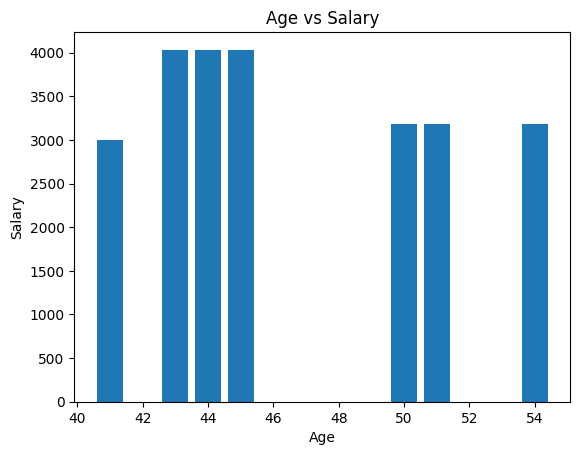

In [188]:
plt.bar(filtered_data["Age"],filtered_data["Salary"])
plt.xlabel('Age')
plt.ylabel('Salary')
plt.title('Age vs Salary')
plt.show()

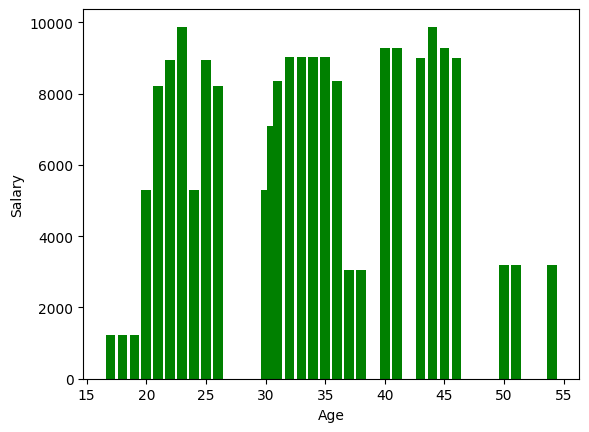

In [190]:
plt.bar(data['Age'],data['Salary'],color='g')
plt.xlabel("Age")
plt.ylabel('Salary')
plt.show()

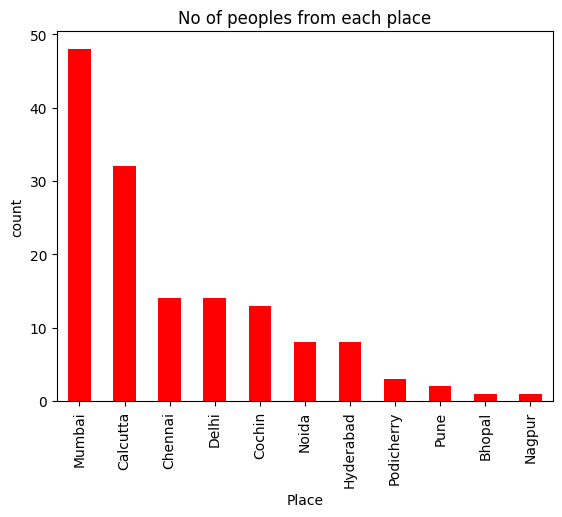

In [192]:
place_count=data['Place'].value_counts()
place_count.plot(kind='bar',color='r')
plt.xlabel("Place")
plt.ylabel("count")
plt.title("No of peoples from each place")
plt.show()

# Data Encoding

In [195]:
data_one_hot_encoded=pd.get_dummies(data=data,columns=['Company','Place'])
data_one_hot_encoded

,Age,Salary,Country,Gender,Company_CTS,Company_Infosys,Company_TCS,Place_Bhopal,Place_Calcutta,Place_Chennai,Place_Cochin,Place_Delhi,Place_Hyderabad,Place_Mumbai,Place_Nagpur,Place_Noida,Place_Podicherry,Place_Pune
0,20.0,5283.471074,India,0,False,False,True,False,False,True,False,False,False,False,False,False,False,False
1,30.0,5283.471074,India,0,False,True,False,False,False,False,False,False,False,True,False,False,False,False
2,35.0,2300.000000,India,0,False,False,True,False,True,False,False,False,False,False,False,False,False,False
3,40.0,3000.000000,India,0,False,True,False,False,False,False,False,True,False,False,False,False,False,False
4,23.0,4000.000000,India,0,False,False,True,False,False,False,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142,22.0,8202.000000,India,0,False,True,False,False,False,False,False,False,False,True,False,False,False,False
143,33.0,9024.000000,India,1,False,False,True,False,True,False,False,False,False,False,False,False,False,False
145,44.0,4034.000000,India,1,False,True,False,False,False,False,False,True,False,False,False,False,False,False
146,33.0,5034.000000,India,1,False,False,True,False,False,False,False,False,False,True,False,False,False,False


In [197]:
from sklearn.preprocessing import OneHotEncoder

In [215]:
#One hot encoding
columns_to_encode = ["Company", "Place"]
new_encoded_columns_names = []
for column in cols_to_encode:
    new_encoded_columns_names += [f"is_{category}" for category in data[column].unique().tolist()]
print(new_encoded_columns_names)
one_hot_encoder = OneHotEncoder(sparse = False, handle_unknown = 'ignore')
encoded_columns = one_hot_encoder.fit_transform(data[columns_to_encode])
data_encoded = pd.DataFrame(encoded_columns, columns = new_encoded_columns_names)
dada_one_hot_encoded = data.join(data_encoded)
print(data_one_hot_encoded)    

['is_TCS', 'is_Infosys', 'is_CTS', 'is_nan', 'is_Chennai', 'is_Mumbai', 'is_Calcutta', 'is_Delhi', 'is_Podicherry', 'is_Cochin', 'is_Noida', 'is_Hyderabad', 'is_Bhopal', 'is_Nagpur', 'is_Pune', 'is_nan']
     Company   Age       Salary     Place Country  Gender  Place_Calcutta  \
0        TCS  20.0  5283.471074   Chennai   India     0.0             0.0   
1    Infosys  30.0  5283.471074    Mumbai   India     0.0             0.0   
2        TCS  35.0  2300.000000  Calcutta   India     0.0             1.0   
3    Infosys  40.0  3000.000000     Delhi   India     0.0             0.0   
4        TCS  23.0  4000.000000    Mumbai   India     0.0             0.0   
..       ...   ...          ...       ...     ...     ...             ...   
146      TCS  33.0  5034.000000    Mumbai   India     1.0             NaN   
147  Infosys  22.0  8202.000000    Cochin   India     0.0             NaN   
84       NaN   NaN          NaN       NaN     NaN     NaN             1.0   
130      NaN   NaN        

C:\Users\ano_k\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [225]:
from sklearn.preprocessing import LabelEncoder

In [230]:
#Label encoding
label_encoder = LabelEncoder()
data['Place'] = label_encoder.fit_transform(data['Place'])
data['Company'] = label_encoder.fit_transform(data['Company'])
data

,Company,Age,Salary,Place,Country,Gender,Place_Calcutta,Place_Chennai,Place_Cochin,Place_Delhi,...,Place_Hyderabad,Place_Mumbai,Place_Nagpur,Place_Noida,Place_Podicherry,Place_Pune,Place_nan,Company_Infosys,Company_TCS,Company_nan
0,2,3,21,2,0,0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,10,21,6,0,0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,2,16,3,1,0,0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1,20,5,4,0,0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,2,6,12,6,0,0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147,1,5,33,3,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
84,3,29,41,11,1,2,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
130,3,29,41,11,1,2,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
131,3,29,41,11,1,2,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


# Feature Scaling:

In [231]:
from sklearn.preprocessing import StandardScaler

In [236]:
#Standard scaler
scaler = StandardScaler()
scaler.fit(data)
scaled_data = scaler.transform(data)
print(scaled_data)

[[ 0.91112156 -1.45982541  0.08797117 ... -0.66421116  1.17088332
  -0.14433757]
 [-0.26145227 -0.47456214  0.08797117 ...  1.50554531 -0.85405607
  -0.14433757]
 [ 0.91112156  0.36994924 -1.37674886 ... -0.66421116  1.17088332
  -0.14433757]
 ...
 [ 2.08369538  2.19972389  1.71543787 ... -0.66421116  1.17088332
  -0.14433757]
 [ 2.08369538  2.19972389  1.71543787 ... -0.66421116  1.17088332
  -0.14433757]
 [ 2.08369538  2.19972389  1.71543787 ... -0.66421116 -0.85405607
   6.92820323]]


In [233]:
from sklearn.preprocessing import MinMaxScaler

In [234]:
#MinMax Scaler
scaler = MinMaxScaler()
scaler.fit(data)
scaled_data = scaler.transform(data)
print(scaled_data)

[[0.66666667 0.10344828 0.51219512 ... 0.         1.         0.        ]
 [0.33333333 0.34482759 0.51219512 ... 1.         0.         0.        ]
 [0.66666667 0.55172414 0.07317073 ... 0.         1.         0.        ]
 ...
 [1.         1.         1.         ... 0.         1.         0.        ]
 [1.         1.         1.         ... 0.         1.         0.        ]
 [1.         1.         1.         ... 0.         0.         1.        ]]
